In [2]:
import os
import logging
#from ananke.models.collection import Collection#, LegacyCollection
from ananke.configurations.collection import HDF5StorageConfiguration
from ananke.models.collection import Collection
logging.getLogger().setLevel(logging.INFO)
import time

In [3]:
config=HDF5StorageConfiguration(data_path='data/merge1.h5',read_only=False)

In [4]:
collection=Collection(config)

In [5]:
collection.open()

In [6]:
hits=collection.storage.get_hits()
detector=collection.storage.get_detector()
records=collection.storage.get_records()
collection.close()

In [7]:
records.df

,location_x,location_y,location_z,orientation_x,orientation_y,orientation_z,record_id,energy,length,time,type,particle_id,duration
0,124.392068,-149.160378,597.33895,-0.423074,0.796321,0.432298,0,423.830054,3000.0,0.0,2,11,NaN


In [8]:
import numpy as np
from ananke.models.detector import Detector
from ananke.models.event import Hits
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



In [18]:
def draw_hit_histogram(N:int,hits: Hits, detector: Detector, colorbar_step=None):
    grouped_dataframe = hits.df.groupby(['string_id']).agg(list)[['time']]
    #display(grouped_dataframe)
    for row in detector.indices.itertuples():
        current_index_tuple = (row.string_id)
        try:
            grouped_dataframe.loc[current_index_tuple]
        except:
            grouped_dataframe.at[current_index_tuple, :] = [-1]

    grouped_dataframe = grouped_dataframe.sort_index()

    histograms = grouped_dataframe['time'].map(lambda x: np.histogram(x, bins=N, range=(0,1000))[0] if x != -1 else np.zeros(N)).reset_index()['time']
    
    #print(type(histograms))
    stacked_histograms = np.log(np.stack(histograms)+1)
    
    fig, ax = plt.subplots()
    #fig.set_figheight(10)
    c = ax.pcolormesh(stacked_histograms)
    #ax.set_xticklabels(np.arange(6)*200)
    ax.set_xlabel('Time [ns]')
    ax.set_ylabel('PMT Number')
    if colorbar_step is None:
        fig.colorbar(c, ax=ax, label='Hit count')
    else:
        fig.colorbar(c, ax=ax, ticks=range(0,int(np.ceil(np.max(stacked_histograms))),colorbar_step), label='Hit count')
    return fig

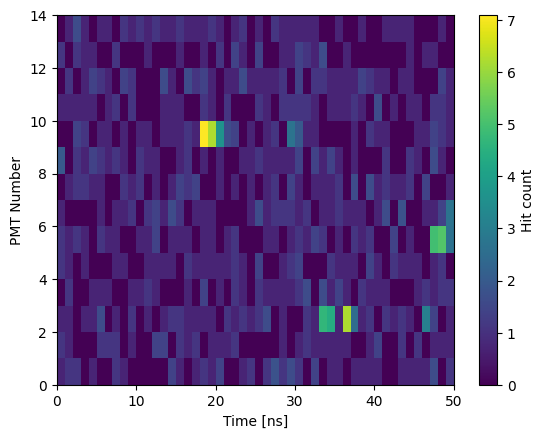

In [19]:
fig=draw_hit_histogram(50,hits,detector)#string

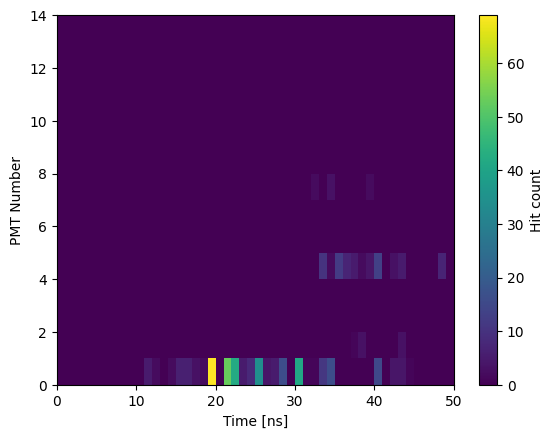

In [28]:
fig=draw_hit_histogram(50,hit1,detector)#modules

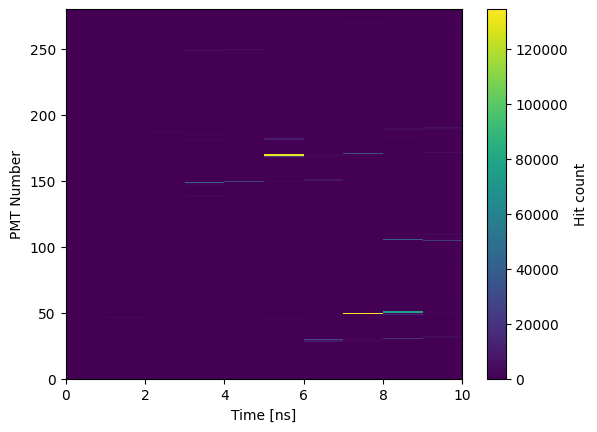

In [78]:
fig=draw_hit_histogram(10,hits,detector)#modules

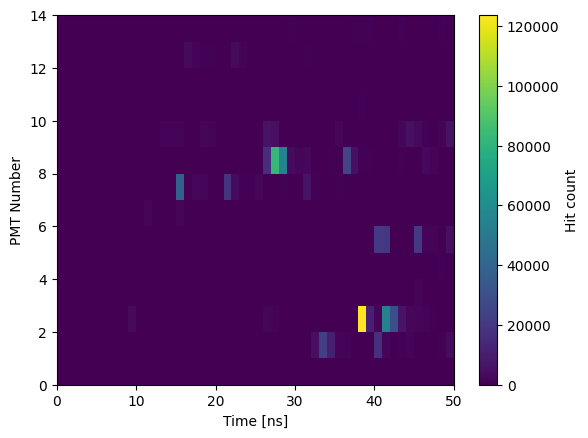

In [29]:
fig=draw_hit_histogram(50,hits,detector)#string